# Customer Churn Prediction Analysis

Project Goal
Predict which customers are likely to leave an e-commerce platform using machine learning, enabling proactive retention efforts.

About the Data
- **5,630 customers** with behavioral and demographic information
- **20 features** including purchase history, customer satisfaction, and account details
- **16.8% churn rate** - representing an imbalanced classification problem

Tasks
1. **Explore** the data to understand what drives customer churn
2. **Preprocess** the data, handling missing values and categorical variables
3. **Build** multiple machine learning models to predict churn
4. **Evaluate** which model performs best and identify key churn factors

This analysis will help the business reduce customer attrition and increase lifetime value.

## Import necessary libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np

# libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from imblearn.over_sampling import SMOTENC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import balanced_accuracy_score

In [3]:
# load the excel data dictionary info data_dict dataframe
data_dict = pd.read_excel('C:/Users/Josphat/Documents/Project/data/E Commerce Dataset.xlsx', sheet_name='Data Dict')

In [4]:
data_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,E Comm,CustomerID,Unique customer ID
2,NaN,E Comm,Churn,Churn Flag
3,NaN,E Comm,Tenure,Tenure of customer in organization
4,NaN,E Comm,PreferredLoginDevice,Preferred login device of customer
5,NaN,E Comm,CityTier,City tier
6,NaN,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
7,NaN,E Comm,PreferredPaymentMode,Preferred payment method of customer
8,NaN,E Comm,Gender,Gender of customer
9,NaN,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...


In [5]:
# load the excel data into dataframe df
df = pd.read_excel('C:/Users/Josphat/Documents/Project/data/E Commerce Dataset.xlsx', sheet_name='E Comm')

## Descriptive analysis

In [6]:
df.shape

(5630, 20)

In [7]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [9]:
# Check for missing variables
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [10]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [11]:
df.describe(include='object')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [12]:
# Check the column cardinality
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [13]:
df.drop(columns='CustomerID', axis=1, inplace=True)

## Exploratory Data Analysis
Create visual representation of the data to generate insights on features relation to churn

### Churn

In [14]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

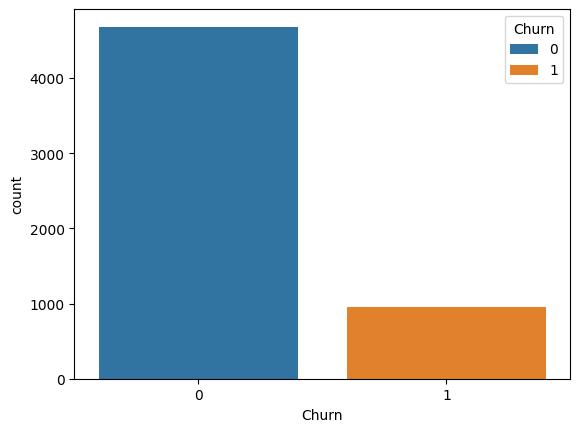

In [15]:
sns.countplot( x='Churn', data=df, hue='Churn');

### Histograms for Numeric Features

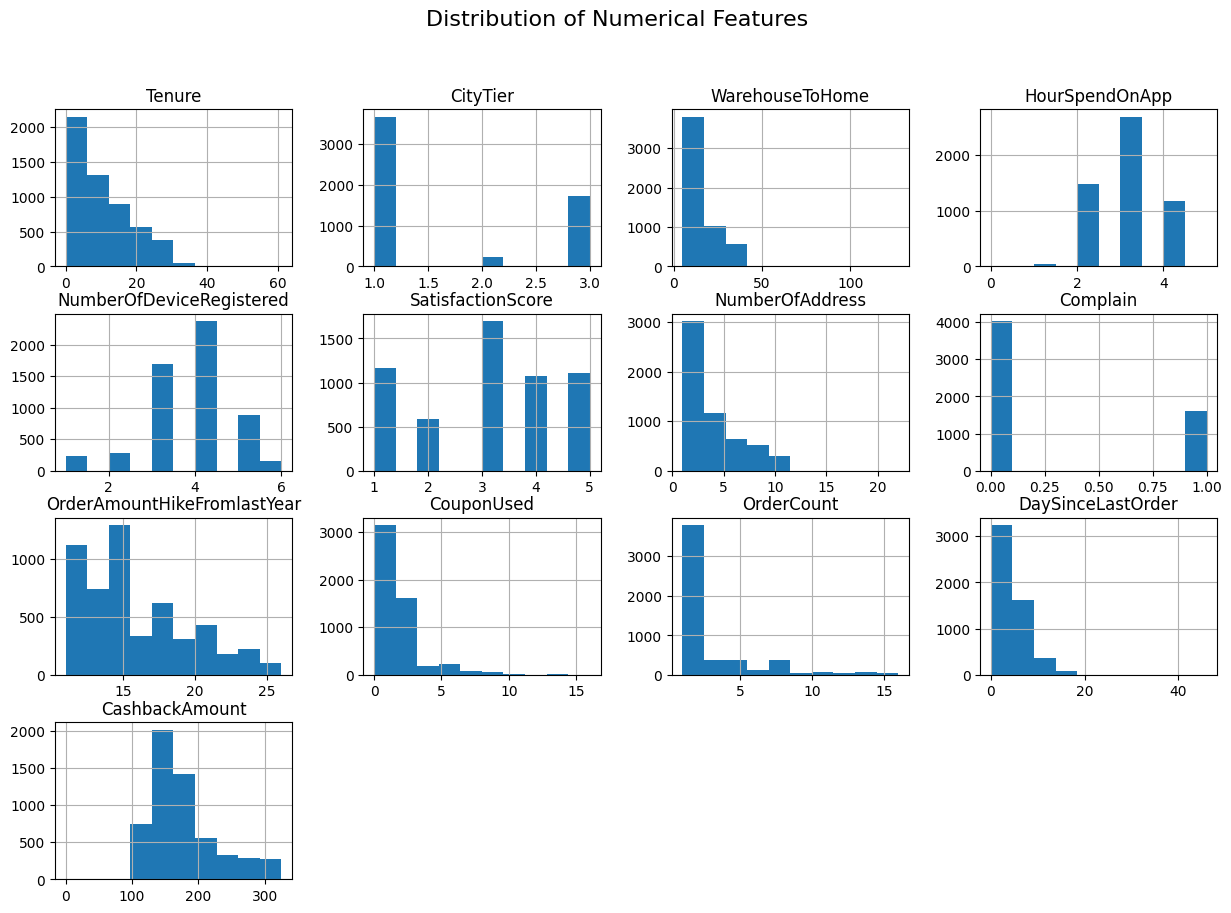

In [16]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Churn') 

df[num_cols].hist(figsize=(15, 10), bins=10)
plt.suptitle("Distribution of Numerical Features", size=16)
plt.show()

### Countplots for categorical fetures

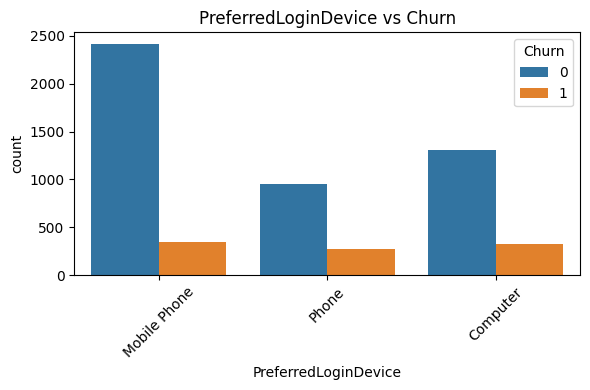

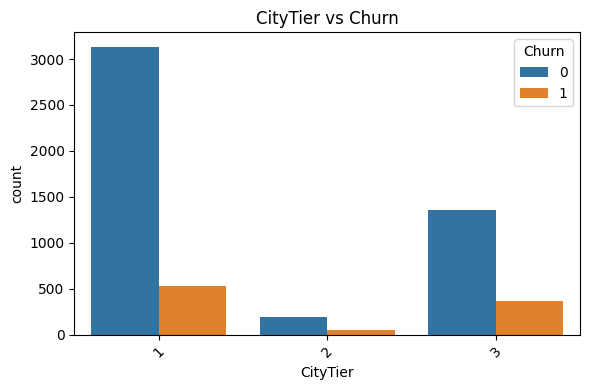

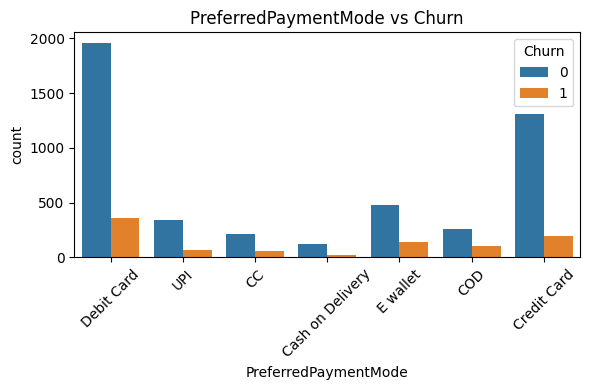

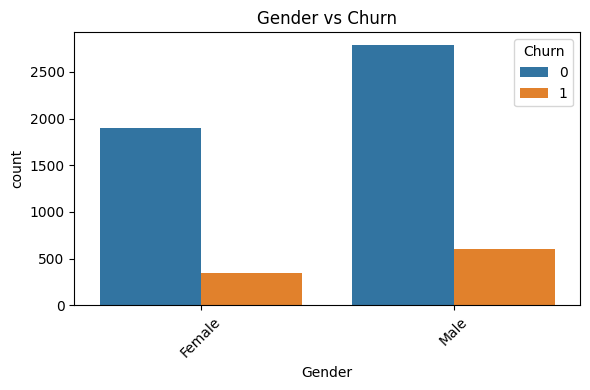

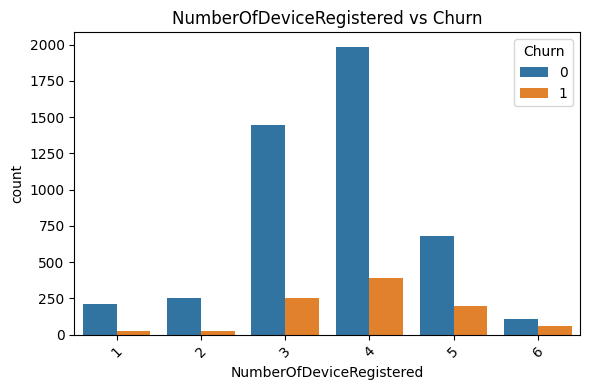

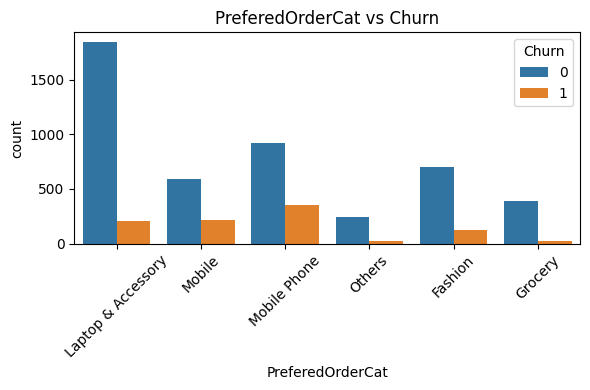

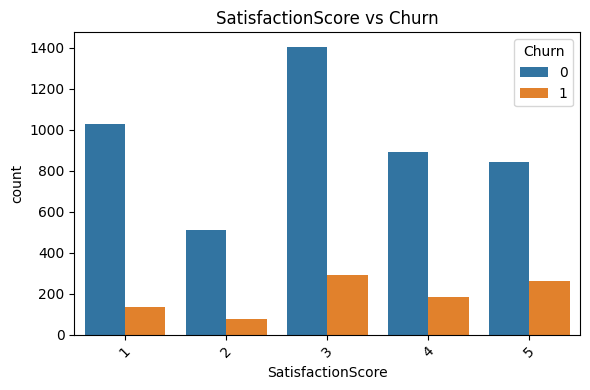

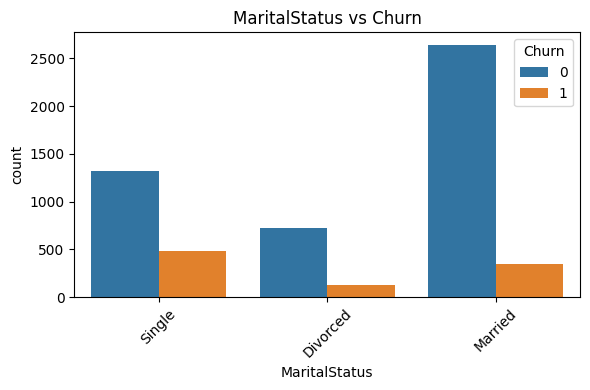

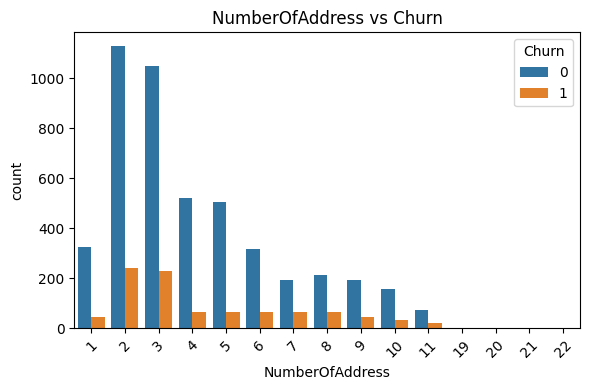

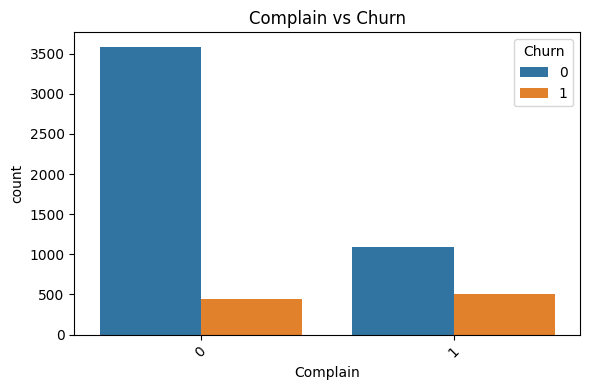

In [17]:
cat_features = [
    'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 
    'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 
    'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 
    'Complain'
]
for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Boxplots for numeric features

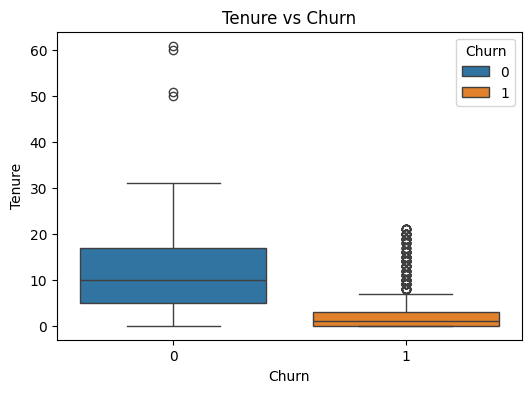

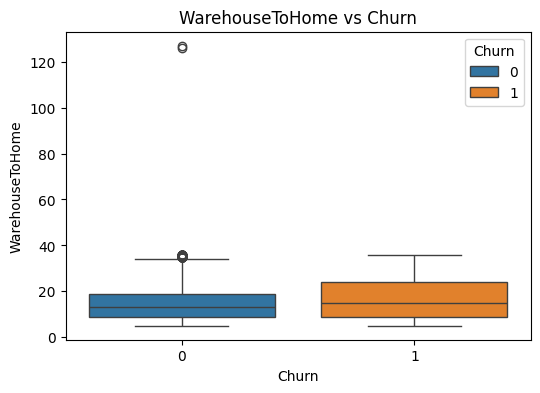

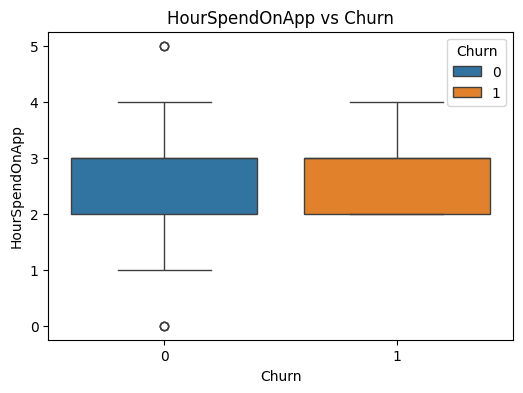

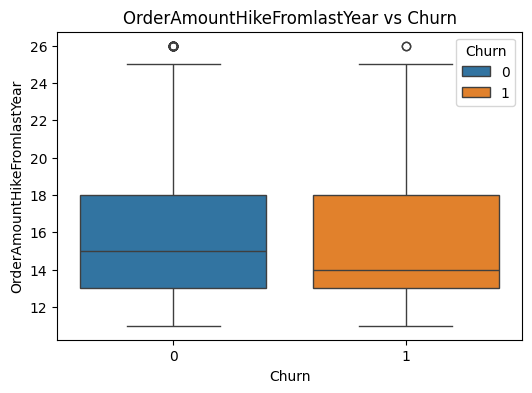

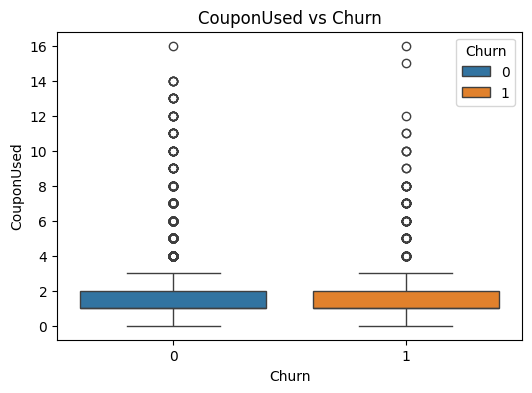

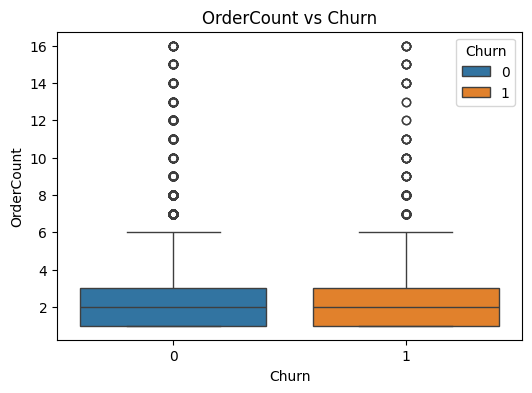

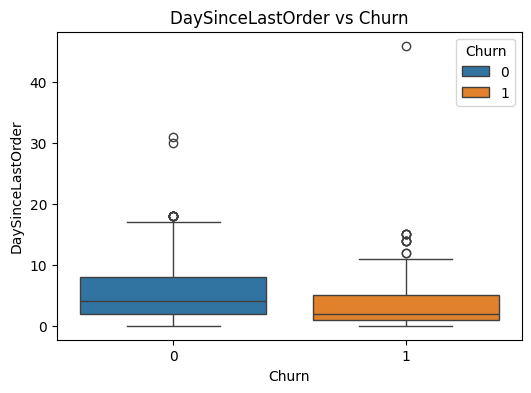

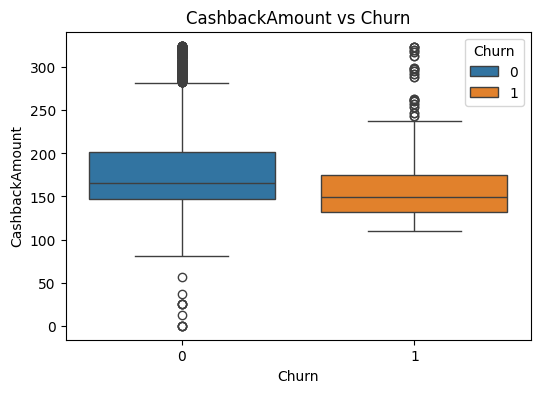

In [18]:
num_features = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
    'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

### Aggregations

In [19]:
df.groupby('Churn')[['Tenure', 'SatisfactionScore', 'CashbackAmount']].mean()

,Tenure,SatisfactionScore,CashbackAmount
Churn,,,
0,11.502334,3.001282,180.635203
1,3.379469,3.390295,160.370928


### Correlation Analysis

In [20]:
corr = df.corr(numeric_only=True)
corr

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525
OrderAmountHikeFromlastYear,-0.010058,0.005825,-0.031408,0.038795,0.106843,0.069475,-0.027730,0.015533,-0.004529,1.000000,0.033201,0.023101,0.006003,0.017869


<Axes: >

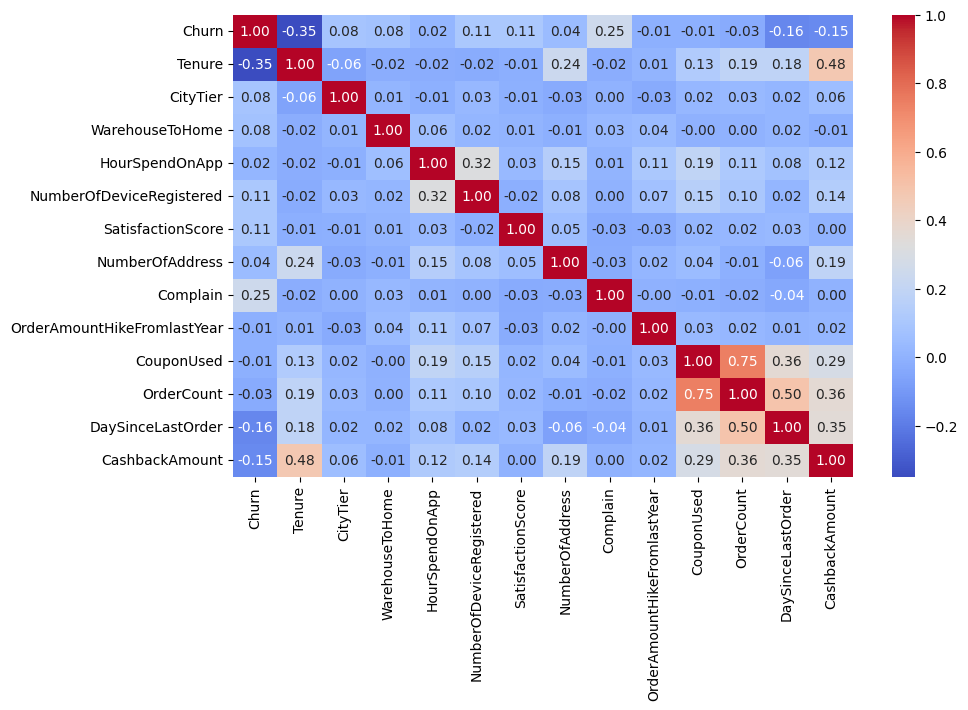

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [22]:
churn_corr = corr['Churn'].abs().sort_values(ascending = False)
churn_corr

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
Name: Churn, dtype: float64

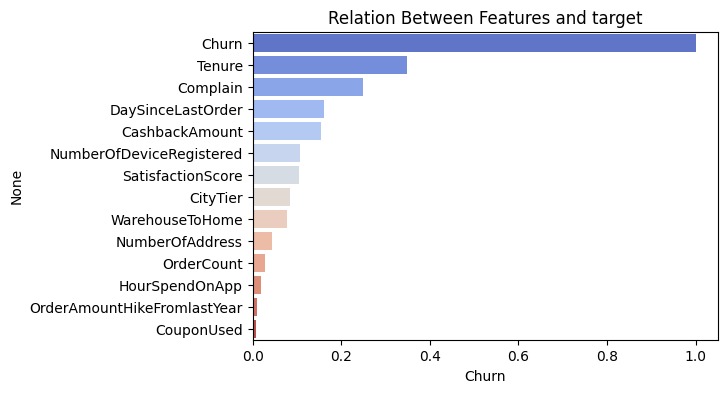

In [23]:
plt.figure(figsize = (6,4))
sns.barplot(x = churn_corr , y = churn_corr.index , palette = 'coolwarm')
plt.title('Relation Between Features and target');

## Feature engineering
 Creating new, more meaningful features from existing data to help machine learning models make better predictions.

In [24]:
df_copy = df.copy()

In [25]:
# Function to create new features
def create_features(df_copy):
    # Customer value metrics
    df_copy['CustomerValueScore'] = (df_copy['CashbackAmount'] * 0.4 + 
                                 df_copy['OrderCount'] * 0.3 + 
                                 df_copy['Tenure'] * 0.3)

    df_copy['AvgCashbackPerOrder'] = df_copy['CashbackAmount'] / df_copy['OrderCount']

    # Recent Activity Flag
    df_copy['RecentActivity'] = (df_copy['DaySinceLastOrder'] < 7).astype(int)
   
    # Activity Density
    df_copy['ActivityDensity'] = df_copy['OrderCount'] / (df_copy['DaySinceLastOrder'] + 1)

    # Spending behavior
    df_copy['Frequency'] = df_copy['OrderCount'] / (df_copy['Tenure'] + 1)

    # Risk score based on multiple factors
    df_copy['ChurnRiskScore'] = (
        (df_copy['Complain'] * 0.3) +
        ((df_copy['DaySinceLastOrder'] > 14).astype(int) * 0.2) +
        ((df_copy['SatisfactionScore'] < 3).astype(int) * 0.2) +
        ((df_copy['Tenure'] < 3).astype(int) * 0.3)
    )

    return df_copy

# Apply feature creation
df_copy = create_features(df_copy)
df_copy.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CustomerValueScore,AvgCashbackPerOrder,RecentActivity,ActivityDensity,Frequency,ChurnRiskScore
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,...,1.0,1.0,5.0,159.93,65.472,159.93,1,0.166667,0.2,0.5
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,...,0.0,1.0,0.0,120.90,NaN,120.90,1,1.000000,NaN,0.3
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,...,0.0,1.0,3.0,120.28,NaN,120.28,1,0.250000,NaN,0.3
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,...,0.0,1.0,3.0,134.07,53.928,134.07,1,0.250000,1.0,0.3
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,...,1.0,1.0,3.0,129.60,52.140,129.60,1,0.250000,1.0,0.3


In [26]:
corr_matrix = df_copy.corr(numeric_only=True)
corr_matrix['Churn'].abs().sort_values(ascending=False)

Churn                          1.000000
ChurnRiskScore                 0.384611
Frequency                      0.373792
Tenure                         0.349408
Complain                       0.250188
CustomerValueScore             0.166556
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
RecentActivity                 0.102720
ActivityDensity                0.086505
CityTier                       0.084703
WarehouseToHome                0.076630
AvgCashbackPerOrder            0.051830
NumberOfAddress                0.043931
OrderCount                     0.028697
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
Name: Churn, dtype: float64

## Data cleaning & preprocessing

- Split the data
- Define numerical and categorical feature lists explicitly.
- Impute missing values (mean for numeric, most frequent for categorical).
- Use a `ColumnTransformer` to keep preprocessing reproducible and pipeline-friendly.

### Test Train Split

In [27]:
# Drop identifier and target columns
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Stratified split to preserve churn proportion
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [28]:
# Combine features and target for train and test sets
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

In [29]:
# Display the distribution of Churn in both sets
print("Original dataset Churn distribution:")
print(df['Churn'].value_counts(normalize=True))
print("\nTraining set Churn distribution:")
print(train_set['Churn'].value_counts(normalize=True))
print("\nTest set Churn distribution:")
print(test_set['Churn'].value_counts(normalize=True))

Original dataset Churn distribution:
Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

Training set Churn distribution:
Churn
0    0.831705
1    0.168295
Name: proportion, dtype: float64

Test set Churn distribution:
Churn
0    0.831261
1    0.168739
Name: proportion, dtype: float64


In [72]:
class DataCleaner(BaseEstimator, TransformerMixin):
    """
    Custom transformer for initial data cleaning, type handling, imputation, 
    and outlier management, designed for the first step of the pipeline.
    """
    def __init__(self, id_col='CustomerID', num_features=None, cat_features=None, 
                 q_lower=0.05, q_upper=0.95):
        
        self.id_col = id_col
        self.num_features = num_features if num_features is not None else []
        self.cat_features = cat_features if cat_features is not None else []
        self.q_lower = q_lower
        self.q_upper = q_upper
        
        # Parameters learned during fit
        self.imputation_values = {}
        self.capping_limits = {} 
        self.cat_imputation_value = 'Missing' 
        
    def _coerce_types(self, X):
        """Helper to ensure categorical features are strings and numerical are floats."""
        X_copy = X.copy()
        
        # 1. Type Correction: Handle columns read as objects but meant to be numeric (if applicable)
        # Note: If your dataset had TotalCharges as object, you'd handle it here.
        # For this dataset, all numerics are floats/ints.
        
        # 2. Ensure numerical features are float types for calculation
        for col in self.num_features:
            if col in X_copy.columns:
                 # Convert to numeric, errors='coerce' turns non-numeric values into NaN
                X_copy[col] = pd.to_numeric(X_copy[col], errors='coerce')

        # 3. Ensure categorical features are string types for consistent handling
        for col in self.cat_features:
            if col in X_copy.columns:
                 X_copy[col] = X_copy[col].astype(str)
                 
        return X_copy

    def fit(self, X, y=None):
        """
        Learns imputation values (median) and outlier limits (quantiles) 
        from the training data.
        """
        X_processed = self._coerce_types(X)
        
        # --- 1. Learn Imputation Values (Median) ---
        for col in self.num_features:
            if col in X_processed.columns:
                # Learn median for numerical imputation (robust to outliers)
                self.imputation_values[col] = X_processed[col].median()
        
        # --- 2. Learn Outlier Capping Limits (Quantiles) ---
        for col in self.num_features:
            if col in X_processed.columns:
                # Calculate the 5th and 95th percentiles from the training data
                lower_bound = X_processed[col].quantile(self.q_lower)
                upper_bound = X_processed[col].quantile(self.q_upper)
                self.capping_limits[col] = (lower_bound, upper_bound)

        return self

    def transform(self, X, y=None):
        """
        Applies cleaning, imputation, outlier management, and drops ID column.
        """
        X_transformed = self._coerce_types(X)

        # 1. Drop Irrelevant Columns
        if self.id_col in X_transformed.columns:
            X_transformed = X_transformed.drop(columns=[self.id_col], errors='ignore')

        # 2. Handle Missing Values (Imputation)
        
        # a) Numerical Imputation (using the median learned in fit)
        for col, value in self.imputation_values.items():
            if col in X_transformed.columns:
                 X_transformed[col] = X_transformed[col].fillna(value)

        # b) Categorical Imputation (filling with 'Missing')
        for col in self.cat_features:
            if col in X_transformed.columns:
                 X_transformed[col] = X_transformed[col].fillna(self.cat_imputation_value)
                 
        # 3. Manage Outliers (Capping/Clamping)
        for col in self.num_features:
            if col in X_transformed.columns and col in self.capping_limits:
                lower, upper = self.capping_limits[col]
                # Apply capping: values below 'lower' become 'lower', values above 'upper' become 'upper'
                X_transformed[col] = np.clip(X_transformed[col], lower, upper)
                
        return X_transformed

In [73]:
# Instantiate the cleaner
cleaner = DataCleaner(
    id_col='CustomerID', 
    num_features=num_features, 
    cat_features=cat_features
)
clean_data = cleaner.fit_transform(X_train)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4504 entries, 1787 to 5140
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       4504 non-null   float64
 1   PreferredLoginDevice         4504 non-null   object 
 2   CityTier                     4504 non-null   object 
 3   WarehouseToHome              4504 non-null   float64
 4   PreferredPaymentMode         4504 non-null   object 
 5   Gender                       4504 non-null   object 
 6   HourSpendOnApp               4504 non-null   float64
 7   NumberOfDeviceRegistered     4504 non-null   object 
 8   PreferedOrderCat             4504 non-null   object 
 9   SatisfactionScore            4504 non-null   object 
 10  MaritalStatus                4504 non-null   object 
 11  NumberOfAddress              4504 non-null   object 
 12  Complain                     4504 non-null   object 
 13  OrderAmountHikeFroml

In [74]:
class CategoryGrouper(BaseEstimator, TransformerMixin):
    """
    A custom transformer for grouping low-frequency or semantically similar 
    categories within specified categorical columns. This helps mitigate 
    cardinality issues and prepares data for efficient encoding.

    The transformer accepts a dictionary of column mappings, where each 
    key is the column name and the value is a dictionary defining the 
    category replacements.
    """
    def __init__(self, mappings: dict):
        """
        Initializes the CategoryGrouper.

        Args:
            mappings (dict): A dictionary where keys are the column names 
                             to be transformed, and values are dictionaries 
                             specifying {old_category: new_category}.
        """
        # Store the user-defined mappings.
        self.mappings = mappings

    def fit(self, X, y=None):
        """
        The CategoryGrouper is a stateless transformer for predefined mappings.
        It does not learn any parameters from the data during the fit process.

        Args:
            X (pd.DataFrame): Input feature data.
            y (pd.Series, optional): Target variable. Defaults to None.
        """
        # No fit required, as the mappings are static/predefined.
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        """
        Applies the predefined categorical grouping transformations to the input data.

        Args:
            X (pd.DataFrame): Input feature data.

        Returns:
            pd.DataFrame: The DataFrame with specified categories replaced 
                          by their new, consolidated group names.
        """
        X_copy = X.copy()
        
        # Iterate through each column and its associated mapping dictionary
        for col, mapping in self.mappings.items():
            
            # Ensure the column exists in the DataFrame before attempting transformation
            if col in X_copy.columns:
                
                # Use pandas' replace method to substitute the old categories 
                # (keys in 'mapping') with the new category (value in 'mapping').
                # This is efficient and handles multiple replacements simultaneously.
                X_copy[col] = X_copy[col].replace(mapping)
                
        return X_copy

In [ ]:
# mappings
mappings = {
    'PreferredPaymentMode': {
        'CC': 'Credit Card',
        'UPI': 'E wallet',
        'COD': 'Cash on Delivery'
    },
    'MaritalStatus': {
        'Divorced': 'Single'
    },
    'PrefferedLoginDevice': {
        'Mobile Phone': 'Phone'
    },
    'PreferedOrderCat': {
        'Mobile': 'Mobile Phone'
    }
}
grouper = CategoryGrouper(mappings)
grouped = grouper.fit_transform(X_train)

In [84]:
grouped['PreferredPaymentMode'].unique()

array(['Credit Card', 'Debit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [31]:
# Identify columns
categorical_features = cat_features + ['RecentActivity']
numerical_features = num_features + ['ChurnRiskScore', 'Frequency', 'AvgCashbackPerOrder', 'ActivityDensity', 'CustomerValueScore']
final_cols = numerical_features + categorical_features 
print('Cat cols: ', categorical_features)
print('Num cols: ', numerical_features)

Cat cols:  ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'RecentActivity']
Num cols:  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'ChurnRiskScore', 'Frequency', 'AvgCashbackPerOrder', 'ActivityDensity', 'CustomerValueScore']


In [173]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    """
    A custom transformer for creating new, predictive features (feature engineering) 
    from existing columns.

    This class handles zero replacement for ratio denominators and computes 
    various interaction and rate features such as Customer Value Score, 
    Activity Density, and a custom Churn Risk Score.
    
    The new features are:
    - CustomerValueScore: A composite loyalty/monetary score.
    - ActivityDensity: Rate of ordering relative to the time since the last order.
    - AvgCashbackPerOrder: Monetary reward efficiency.
    - RecentActivity (Flag): Binary flag for high recent engagement.
    - Frequency: Average orders per unit of tenure.
    - ChurnRiskScore: A heuristic-based aggregate score of risk factors.
    """
    def __init__(self, numerical_features: list, categorical_features: list):
        self.numerical_features = numerical_features
        self.categorical_features = categorical_features
        self.feature_names = []
    
    def fit(self, X, y=None):
        """
        The FeatureEngineer is a stateless transformer for predefined calculations.
        It does not learn any parameters from the data during the fit process.
        
        Args:
            X (pd.DataFrame): Input feature data.
            y (pd.Series, optional): Target variable. Defaults to None.
        """
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        """
        Applies the feature engineering steps.

        Args:
            X (pd.DataFrame): Input feature data (already cleaned and imputed).

        Returns:
            pd.DataFrame: DataFrame containing original features plus new engineered features.
        """
        X = X.copy()

        # --- 1. Safe Zero Handling for Ratio Calculations ---
        # NOTE: This step is crucial. Replacing 0 with a very small number (0.001) prevents 
        # ZeroDivisionError when calculating ratios like Frequency or ActivityDensity.
        # This is necessary even though the DataCleaner handled NaNs.
        X['Tenure_adj'] = X['Tenure'].replace(0, 0.001)
        X['DaySinceLastOrder_adj'] = X['DaySinceLastOrder'].replace(0, 0.001)
        X['OrderCount_adj'] = X['OrderCount'].replace(0, 0.001)
        
        # --- 2. Interaction and Composite Scores ---
        
        # Customer Value Score: A weighted sum of key monetary and loyalty indicators.
        X['CustomerValueScore'] = (X['CashbackAmount'] * 0.4 + 
                                   X['OrderCount_adj'] * 0.3 + 
                                   X['Tenure_adj'] * 0.3)
        
        # Activity Density: Rate of ordering relative to the time since the last order.
        X['ActivityDensity'] = X['OrderCount_adj'] / X['DaySinceLastOrder_adj']

        # Avg Cashback Per Order: Monetary reward efficiency.
        X['AvgCashbackPerOrder'] = X['CashbackAmount'] / X['OrderCount_adj']
        
        # --- 3. Behavioral Flags and Rates ---
        
        # Recent Activity Flag: A binary flag for customers highly active in the last week.
        X['RecentActivity'] = (X['DaySinceLastOrder'] < 7).astype(int)
        
        # Average Orders Per Unit Tenure (Frequency): A measure of loyalty/engagement intensity.
        X['Frequency'] = X['OrderCount_adj'] / X['Tenure_adj']
        
        # Churn Risk Score: A composite score based on known risk factors (heuristics).
        # This combines binary flags for complaints, low satisfaction, low tenure, and inactivity.
        X['ChurnRiskScore'] = (
            (X['Complain'].astype(int) * 0.3) +
            ((X['DaySinceLastOrder'] > 14).astype(int) * 0.2) +
            ((X['SatisfactionScore'].astype(int) < 3).astype(int) * 0.2) +
            ((X['Tenure'] < 3).astype(int) * 0.3)
        )

        # --- 4. Cleanup ---
        # Drop the temporary adjusted columns used for safe division
        X = X.drop(['Tenure_adj', 'DaySinceLastOrder_adj', 'OrderCount_adj'], axis=1)
        # 1. Combine the two lists in the desired order
        ordered_cols = self.numerical_features + self.categorical_features
        
        # 2. Check if the DataFrame contains all required columns
        # (This is a good practice safeguard)
        missing_cols = set(ordered_cols) - set(X.columns)
        if missing_cols:
            raise ValueError(f"FeatureEngineer is missing columns before reordering: {missing_cols}")

        # 3. Reorder the DataFrame using the fixed column list
        X = X[ordered_cols]
  
        
        # Store the final feature names for reference in subsequent pipeline steps
        self.feature_names = list(X.columns)
        
        return X
    
    def get_feature_names_out(self, input_features=None):
        """
        Returns the names of the columns output by the transformer, 
        ensuring scikit-learn compatibility.
        """
        return self.feature_names

### Transformation Pipelines

In [37]:
# 1. Custom Feature Pipeline: Bundles the cleaning, grouping, and engineering steps
feature_preparation_pipeline = Pipeline(steps=[
    # Step 1: Initial Cleaning, Imputation, Outlier Handling, and Dropping ID/Irrelevant columns
    ('cleaner', DataCleaner(
        id_col='CustomerID', 
        num_features=num_features,
        cat_features=cat_features
    )),
    
    # Step 2: Consolidate low-frequency or similar categories
    ('grouper', CategoryGrouper(mappings)),
    
    # Step 3: Create new features (based on the cleaned data)
    ('engineer', FeatureEngineer(numerical_features=numerical_features, categorical_features=categorical_features)) 
])

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        # Apply Scaling to all numerical features
        ('num', StandardScaler(), numerical_features),
        
        # Apply One-Hot Encoding to all categorical features
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough' # Ensure no other columns (if any) are dropped
)

In [33]:
NUM_COLS_COUNT = 13
CAT_COLS_COUNT = 11
preprocessor2 = ColumnTransformer(
    transformers=[
        # Apply Scaling to all numerical features
        ('num', StandardScaler(), numerical_features),
        
        # Apply One-Hot Encoding to all categorical features
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
         list(range(NUM_COLS_COUNT, NUM_COLS_COUNT + CAT_COLS_COUNT))),
    ],
    remainder='passthrough')

## Adressing imbalance with SMOTENC
SMOTENC is an extension of the original SMOTE algorithm designed to handle mixed datasets (nominal/categorical and continuous features). The core idea is to create synthetic examples of the minority class, rather than simply duplicating existing ones, to address class imbalance and improve model performance. 

In [38]:
# Proprocessing and getting cat_features indices for SMOTENC
X_train_prep = feature_preparation_pipeline.fit_transform(X_train)
X_test_prep = feature_preparation_pipeline.transform(X_test)

In [39]:
# Get the list of all columns from the transformed DataFrame
all_columns = X_train_prep.columns.tolist()

# The categorical features start right after the numerical features end
num_cols_count = len(numerical_features) 

# Create the index list using range()
categorical_indices = list(range(num_cols_count, len(all_columns)))

print(f"Numerical Features End at Index: {num_cols_count - 1}")
print(f"SMOTENC Categorical Indices: {categorical_indices}")

Numerical Features End at Index: 12
SMOTENC Categorical Indices: [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [139]:
smote = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prep, y_train)
X_train_resampled.shape, y_train_resampled.shape

((7492, 24), (7492,))

In [140]:
X_train_resampled.head()

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,ChurnRiskScore,Frequency,...,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,RecentActivity
0,9.0,16.0,2.0,14.0,6.0,9.0,7.0,199.80,0.2,1.000000,...,3,Credit Card,Male,3,Fashion,1,Single,2,0,0
1,6.0,13.0,2.0,17.0,0.0,1.0,2.0,143.02,0.0,0.166667,...,3,Debit Card,Female,3,Laptop & Accessory,4,Married,1,0,1
2,8.0,15.0,3.0,19.0,0.0,1.0,0.0,165.40,0.0,0.125000,...,1,Debit Card,Male,4,Laptop & Accessory,4,Single,10,0,1
3,15.0,11.0,3.0,19.0,6.0,7.0,7.0,184.46,0.3,0.466667,...,3,Debit Card,Male,3,Fashion,4,Single,10,1,0
4,12.0,13.0,4.0,12.0,3.0,8.0,8.0,178.21,0.0,0.666667,...,1,Debit Card,Male,5,Laptop & Accessory,3,Married,4,0,0


## Model Training

### Baesline Model
simple baseline that always predicts no churn

In [115]:
majority_class = float(df['Churn'].value_counts(normalize=True).max() * 100)
majority_class

83.16163410301954

### Models to train

#### Logistic Regression

In [145]:
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'))
])
lr.fit(X_train_prep, y_train)
y_pred = lr.predict(X_test_prep)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.7638720197930724
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       936
           1       0.72      0.57      0.64       190

    accuracy                           0.89      1126
   macro avg       0.82      0.76      0.79      1126
weighted avg       0.88      0.89      0.88      1126



In [147]:
lr_balanced = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
lr_balanced.fit(X_train_resampled, y_train_resampled)
y_pred = lr_balanced.predict(X_test_prep)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.8260458839406207
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       936
           1       0.48      0.83      0.61       190

    accuracy                           0.82      1126
   macro avg       0.72      0.83      0.75      1126
weighted avg       0.88      0.82      0.84      1126



In [148]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=None, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        eval_metric="logloss"
    ),
    "SVM": SVC(
        kernel="rbf",
        probability=True, 
        C=1.0,
        gamma="scale",
        random_state=42
    )
}

### Cross-Validation setup

In [149]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Train and evaluate models

In [150]:
results = {}
best_model = None
best_score = 0

for model_name, model in models.items():
    
    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ("classifier", model)
])
    print(f"\nTraining: {model_name}")

    cv_results = cross_validate(
        pipeline,
        X_train_resampled,
        y_train_resampled,
        cv=cv,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        n_jobs=-1
    )

    avg_roc_auc = cv_results['test_roc_auc'].mean()

    results[model_name] = {
        "accuracy": cv_results['test_accuracy'].mean(),
        "precision": cv_results['test_precision'].mean(),
        "recall": cv_results['test_recall'].mean(),
        "f1": cv_results['test_f1'].mean(),
        "roc_auc": avg_roc_auc
    }

    print(f"Mean ROC-AUC: {avg_roc_auc:.4f}")

    # Track best model by ROC-AUC
    if avg_roc_auc > best_score:
        best_score = avg_roc_auc
        best_model = pipeline



Training: Logistic Regression
Mean ROC-AUC: 0.9176

Training: Decision Tree
Mean ROC-AUC: 0.9389

Training: Random Forest
Mean ROC-AUC: 0.9942

Training: Gradient Boosting
Mean ROC-AUC: 0.9760

Training: XGBoost
Mean ROC-AUC: 0.9936

Training: SVM
Mean ROC-AUC: 0.9753


In [151]:
best_model

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [152]:
results = pd.DataFrame(results)
results

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,XGBoost,SVM
accuracy,0.846102,0.938868,0.966630,0.922183,0.967965,0.928990
precision,0.840801,0.934508,0.962976,0.915457,0.968765,0.913604
recall,0.853980,0.943939,0.970633,0.930326,0.967165,0.947679
f1,0.847293,0.939170,0.966734,0.922766,0.967923,0.930289
roc_auc,0.917625,0.938867,0.994197,0.976022,0.993564,0.975258


### Fine tune the model with Gridsearch

#### Random Forest

In [153]:
param_grid_rf = {
    "classifier__n_estimators": [200, 300, 500],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2],
    "classifier__bootstrap": [True, False]
}

In [154]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [155]:
grid_rf = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__bootstrap': [True, False], 'classifier__max_depth': [None, 10, ...], 'classifier__min_samples_leaf': [1, 2], 'classifier__min_samples_split': [2, 5], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [204]:
print("Best ROC-AUC:", grid_rf.best_score_)
print("\nBest Parameters:", grid_rf.best_params_)

Best ROC-AUC: 0.9961460974222861

Best Parameters: {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500}


#### XGBClassifier

In [201]:
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
}

In [202]:
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ("classifier", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1))
])

In [ ]:
grid_xgb = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=2
)

grid_xgb.fit(X_train, y_train)
print("Best ROC-AUC:", grid_xgb.best_score_)
print("Best params:", grid_xgb.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\Josphat\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:49:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best ROC-AUC: 0.9745324050362336
Best params: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__subsample': 1.0}


### Final model tuned with best params from Gridsearch

In [174]:
final_pipeline = ImbPipeline([
    ('cleaner', DataCleaner(
        id_col='CustomerID', 
        num_features=num_features,
        cat_features=cat_features
    )),
    ('category_grouper', CategoryGrouper(mappings)),
    ('feature_engineer', FeatureEngineer(numerical_features, categorical_features)),
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)),
    ('preprocessor', preprocessor),
    ("classifier", RandomForestClassifier(n_estimators= 500,
                                          bootstrap= False, 
                                          max_depth= None, 
                                          min_samples_leaf= 1, 
                                          min_samples_split= 2,
                                          random_state = 42 ))
])

In [175]:
final_pipeline.fit(X_train, y_train)

,steps,"[('cleaner', ...), ('category_grouper', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,id_col,'CustomerID'
,num_features,"['Tenure', 'WarehouseToHome', ...]"
,cat_features,"['PreferredLoginDevice', 'CityTier', ...]"
,q_lower,0.05
,q_upper,0.95
,mappings,"{'MaritalStatus': {'Divorced': 'Single'}, 'PreferedOrderCat': {'Mobile': 'Mobile Phone'}, 'PreferredPaymentMode': {'CC': 'Credit Card', 'COD': 'Cash on Delivery', 'UPI': 'E wallet'}, 'PrefferedLoginDevice': {'Mobile Phone': 'Phone'}}"
,numerical_features,"['Tenure', 'WarehouseToHome', ...]"


In [212]:
# Evaluate the system on the test set
y_pred = final_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Test ROC AUC Score: {roc_auc}")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9689165186500888
Test ROC AUC Score: 0.9519399460188933
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       936
           1       0.89      0.93      0.91       190

    accuracy                           0.97      1126
   macro avg       0.94      0.95      0.95      1126
weighted avg       0.97      0.97      0.97      1126



In [227]:
# Using Ordinal encoder in the preprocessor
final_pipeline2 = ImbPipeline([
    ('cleaner', DataCleaner(
        id_col='CustomerID', 
        num_features=num_features,
        cat_features=cat_features
    )),
    ('category_grouper', CategoryGrouper(mappings)),
    ('feature_engineer', FeatureEngineer(numerical_features, categorical_features)),
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)),
    ('preprocessor', preprocessor2),
    ("classifier", RandomForestClassifier(n_estimators= 500,
                                          bootstrap= False, 
                                          max_depth= None, 
                                          min_samples_leaf= 1, 
                                          min_samples_split= 2,
                                          random_state = 42 ))
])

In [228]:
final_pipeline2.fit(X_train, y_train)

,steps,"[('cleaner', ...), ('category_grouper', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,id_col,'CustomerID'
,num_features,"['Tenure', 'WarehouseToHome', ...]"
,cat_features,"['PreferredLoginDevice', 'CityTier', ...]"
,q_lower,0.05
,q_upper,0.95
,mappings,"{'MaritalStatus': {'Divorced': 'Single'}, 'PreferedOrderCat': {'Mobile': 'Mobile Phone'}, 'PreferredPaymentMode': {'CC': 'Credit Card', 'COD': 'Cash on Delivery', 'UPI': 'E wallet'}, 'PrefferedLoginDevice': {'Mobile Phone': 'Phone'}}"
,numerical_features,"['Tenure', 'WarehouseToHome', ...]"


In [229]:
y_pred = final_pipeline2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Test ROC AUC Score: {roc_auc}")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9769094138543517
Test ROC AUC Score: 0.9630398110661269
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       936
           1       0.92      0.94      0.93       190

    accuracy                           0.98      1126
   macro avg       0.96      0.96      0.96      1126
weighted avg       0.98      0.98      0.98      1126



## Ensemble Stacking Classifier

In [34]:
# A. Optimized RF 
rf_best = RandomForestClassifier(n_estimators=500, bootstrap=False, max_depth=None, 
                                 min_samples_leaf=1, min_samples_split=2, random_state=42, 
                                 n_jobs=-1)

# B. Optimized XGBoost Classifier 
xgb_base = XGBClassifier(n_estimators=300, max_depth=7, subsample=1.0, colsample_bytree=0.8, learning_rate=0.1, eval_metric='logloss', 
                        random_state=42, n_jobs=-1)
# C. Meta Classifier (Level 1)
meta_clf = LogisticRegression(solver='liblinear', random_state=42)
# Define the Stacking Ensemble
from sklearn.ensemble import StackingClassifier
stacking_ensemble = StackingClassifier(
    estimators=[
        ('rf', rf_best),
        ('xgb', xgb_base)
    ],
    final_estimator=meta_clf,
    # Use cross-validation to generate level-1 features (default is 5-fold)
    cv=5 
)

In [35]:
from custom_transformers import DataCleaner, CategoryGrouper, FeatureEngineer
import joblib

In [40]:
final_stacking_pipeline = ImbPipeline([
    # Stage 1: Custom Feature Preparation
    ('cleaner', DataCleaner(id_col='CustomerID', num_features=num_features, cat_features=cat_features)),
    ('category_grouper', CategoryGrouper(mappings)),
    ('feature_engineer', FeatureEngineer(numerical_features, categorical_features)),
    
    # Stage 2: Preprocessing and Resampling
    ('preprocessor', preprocessor2), # OE converts all features to numerical
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)), # SMOTE works on the numerical output
    
    # Stage 3: The Stacking Classifier
    ("stacking_classifier", stacking_ensemble) 
])

In [41]:
final_stacking_pipeline.fit(X_train, y_train)

,steps,"[('cleaner', ...), ('category_grouper', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,id_col,'CustomerID'
,num_features,"['Tenure', 'WarehouseToHome', ...]"
,cat_features,"['PreferredLoginDevice', 'CityTier', ...]"
,q_lower,0.05
,q_upper,0.95
,mappings,"{'MaritalStatus': {'Divorced': 'Single'}, 'PreferedOrderCat': {'Mobile': 'Mobile Phone'}, 'PreferredPaymentMode': {'CC': 'Credit Card', 'COD': 'Cash on Delivery', 'UPI': 'E wallet'}, 'PrefferedLoginDevice': {'Mobile Phone': 'Phone'}}"
,numerical_features,"['Tenure', 'WarehouseToHome', ...]"


### Evaluating final_stacking_pipeline

In [220]:
y_pred = final_stacking_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Test ROC AUC Score: {roc_auc}")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9795737122557726
Test ROC AUC Score: 0.9709345479082321
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       936
           1       0.92      0.96      0.94       190

    accuracy                           0.98      1126
   macro avg       0.96      0.97      0.96      1126
weighted avg       0.98      0.98      0.98      1126



In [221]:
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_pred),
    "classification_report": classification_report(y_test, y_pred, output_dict=True)
}

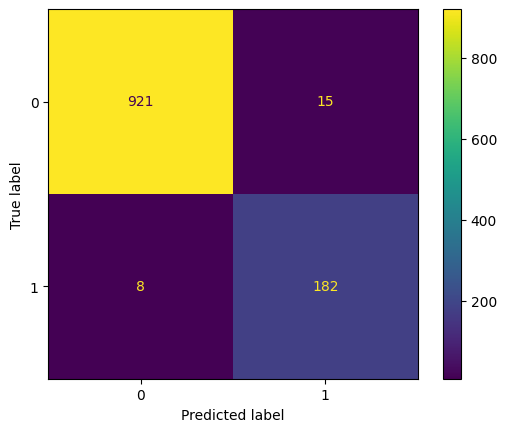

In [222]:
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [230]:
# Get feature names after preprocessing
features = final_pipeline2.named_steps['preprocessor'].get_feature_names_out()
importances = final_pipeline2.named_steps['classifier'].feature_importances_

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp

num__ChurnRiskScore                 0.142804
num__Frequency                      0.142604
num__Tenure                         0.114915
num__CustomerValueScore             0.059020
num__CashbackAmount                 0.052178
num__ActivityDensity                0.048163
num__AvgCashbackPerOrder            0.043479
cat__SatisfactionScore              0.042027
cat__Complain                       0.039615
num__WarehouseToHome                0.038484
num__DaySinceLastOrder              0.035017
num__OrderAmountHikeFromlastYear    0.028696
cat__NumberOfAddress                0.027791
cat__PreferedOrderCat               0.023268
cat__MaritalStatus                  0.021100
cat__NumberOfDeviceRegistered       0.020479
cat__CityTier                       0.019633
num__CouponUsed                     0.019575
cat__PreferredPaymentMode           0.018200
num__HourSpendOnApp                 0.017170
num__OrderCount                     0.013295
cat__PreferredLoginDevice           0.013136
cat__Gende

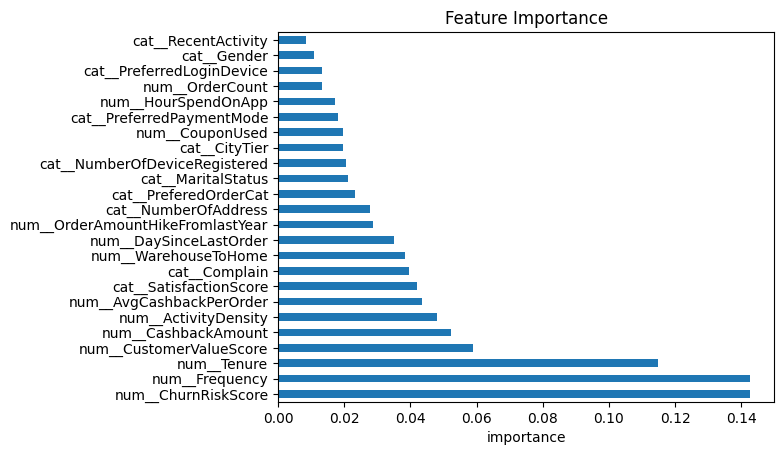

In [231]:
feat_imp.plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance');

## Save the best model

In [ ]:
import joblib

joblib.dump(final_pipeline2, "C:\\Users\\Josphat\\Documents\\Project\\models\\churn_pipeline.pkl")

joblib.dump((numerical_features, categorical_features), "C:\\Users\\Josphat\\Documents\\Project\\models\\columns.pkl")

In [42]:
joblib.dump(final_stacking_pipeline, "C:\\Users\\Josphat\\Documents\\Project\\models\\churn_pipeline2.pkl")


['C:\\Users\\Josphat\\Documents\\Project\\models\\churn_pipeline2.pkl']

In [233]:
joblib.dump([num_features, cat_features], "C:\\Users\\Josphat\\Documents\\Project\\models\\base_columns.pkl")

['C:\\Users\\Josphat\\Documents\\Project\\models\\base_columns.pkl']

In [234]:
import json
# Save metrics
with open("C:\\Users\\Josphat\\Documents\\Project\\models\\metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)